
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







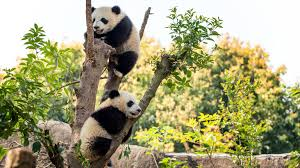


In [ ]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [ ]:
! git clone https://github.com/nhsengland/Digdata

### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [ ]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [ ]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.








### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



In [4]:
# NHS Python Challenge

In [2]:
# Chengdou Wei, Durham University

import pandas as pd

# Load the datasets
summary_df = pd.read_csv("/content/BSA_ODP_PCA_REGIONAL_SUMMARY.csv")
drug_df = pd.read_csv("/content/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv")

# Display
print("Summary Data:")
display(summary_df.head())

print("\nDrug Data:")
display(drug_df.head())

Summary Data:


,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70



Drug Data:


,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72


In [3]:
# Data Cleaning
# missing values check
print("Missing values in Summary Data:")
print(summary_df.isnull().sum())

print("\nMissing values in Drug Data:")
print(drug_df.isnull().sum())

# basic statistics check
print("\nSummary Data Statistics:")
display(summary_df.describe())

print("\nDrug Data Statistics:")
display(drug_df.describe())


Missing values in Summary Data:
YEAR_MONTH     0
REGION_NAME    0
ITEMS          0
COST           0
dtype: int64

Missing values in Drug Data:
YEAR                      0
YEAR_MONTH                0
REGION_NAME               0
BNF_CHEMICAL_SUBSTANCE    0
ITEMS                     0
COST                      0
dtype: int64

Summary Data Statistics:


,YEAR_MONTH,ITEMS,COST
count,322.000000,3.220000e+02,3.220000e+02
mean,202249.760870,1.034402e+06,2.894256e+06
std,109.559108,3.050428e+05,8.440603e+05
min,202101.000000,6.387520e+05,1.580214e+06
25%,202112.000000,7.983028e+05,2.189782e+06
50%,202211.500000,9.155985e+05,2.784099e+06
75%,202311.000000,1.303790e+06,3.456533e+06
max,202410.000000,1.845998e+06,6.146084e+06



Drug Data Statistics:


,YEAR,YEAR_MONTH,ITEMS,COST
count,9455.000000,9455.000000,9455.000000,9.455000e+03
mean,2022.431623,202249.442623,35227.665891,9.856693e+04
std,1.096446,109.390932,70594.998779,1.721329e+05
min,2021.000000,202101.000000,1.000000,1.100000e+00
25%,2021.000000,202112.000000,165.000000,6.541955e+03
50%,2022.000000,202211.000000,1741.000000,3.602232e+04
75%,2023.000000,202311.000000,24660.000000,1.103895e+05
max,2024.000000,202410.000000,491676.000000,2.721513e+06


In [5]:
# Total Cost per Region

# Group by Region, sum up the costs
region_cost = summary_df.groupby("REGION_NAME")["COST"].sum().reset_index()

# Sort, highest cost
region_cost = region_cost.sort_values(by="COST", ascending=False)

# Results
print("Total Cost per Region:")
display(region_cost)


Total Cost per Region:


,REGION_NAME,COST
2,MIDLANDS,1.761022e+08
3,NORTH EAST AND YORKSHIRE,1.755055e+08
5,SOUTH EAST,1.435012e+08
4,NORTH WEST,1.321767e+08
0,EAST OF ENGLAND,1.058483e+08
1,LONDON,1.045064e+08
6,SOUTH WEST,9.430996e+07


In [6]:
# TOP 10 Most Prescribed Drugs

# Group by Drug Name, sum up the items
top_drugs = drug_df.groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"].sum().reset_index()

# Sort, highest prescribed
top_drugs = top_drugs.sort_values(by="ITEMS", ascending=False).head(10)

# Results
print("Top 10 Most Prescribed Drugs:")
display(top_drugs)


Top 10 Most Prescribed Drugs:


,BNF_CHEMICAL_SUBSTANCE,ITEMS
25,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
3,Citalopram hydrobromide,52891620
17,Mirtazapine,46335570
10,Fluoxetine hydrochloride,28211759
30,Venlafaxine,21447209
8,Duloxetine hydrochloride,14262656
9,Escitalopram,6580386
22,Paroxetine hydrochloride,4886615
27,Trazodone hydrochloride,4861813


from matplotlib import pyplot as plt
top_drugs['ITEMS'].plot(kind='hist', bins=20, title='ITEMS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_drugs['ITEMS'].plot(kind='line', figsize=(8, 4), title='ITEMS')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
# Average Cost per Item for each Drug

# Calculate cost per item
drug_df["COST_PER_ITEM"] = drug_df["COST"] / drug_df["ITEMS"]

# Group by Drug Name, the mean cost per item
avg_cost_per_drug = drug_df.groupby("BNF_CHEMICAL_SUBSTANCE")["COST_PER_ITEM"].mean().reset_index()

# Sort, highest cost per item
avg_cost_per_drug = avg_cost_per_drug.sort_values(by="COST_PER_ITEM", ascending=False)

# Results
print("Average Cost per Item for Each Drug:")
display(avg_cost_per_drug)


Average Cost per Item for Each Drug:


,BNF_CHEMICAL_SUBSTANCE,COST_PER_ITEM
26,Tranylcypromine sulfate,1372.850734
19,Nefazodone hydrochloride,587.784688
14,Isocarboxazid,428.977524
28,Trimipramine maleate,375.701522
23,Phenelzine sulfate,305.615095
7,Doxepin,202.427738
2,Amoxapine,183.680000
29,Tryptophan,134.897271
16,Mianserin hydrochloride,63.720240
21,Oxitriptan,51.282681


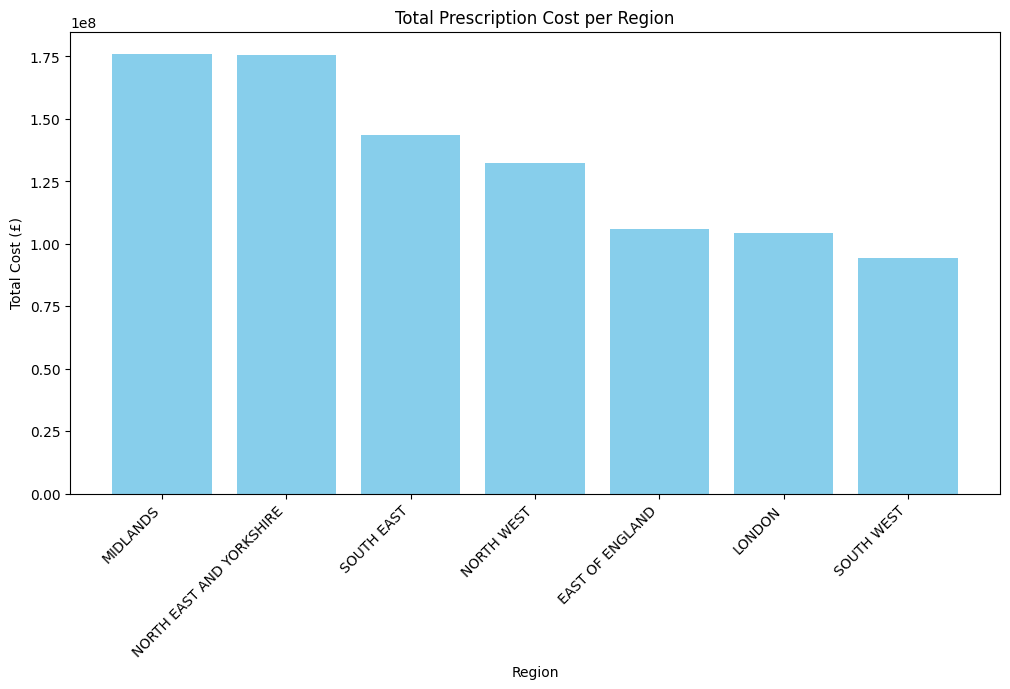

In [8]:
# Visualization

import matplotlib.pyplot as plt

# Plot total cost per region
plt.figure(figsize=(12,6))
plt.bar(region_cost["REGION_NAME"], region_cost["COST"], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Region")
plt.ylabel("Total Cost (£)")
plt.title("Total Prescription Cost per Region")
plt.show()


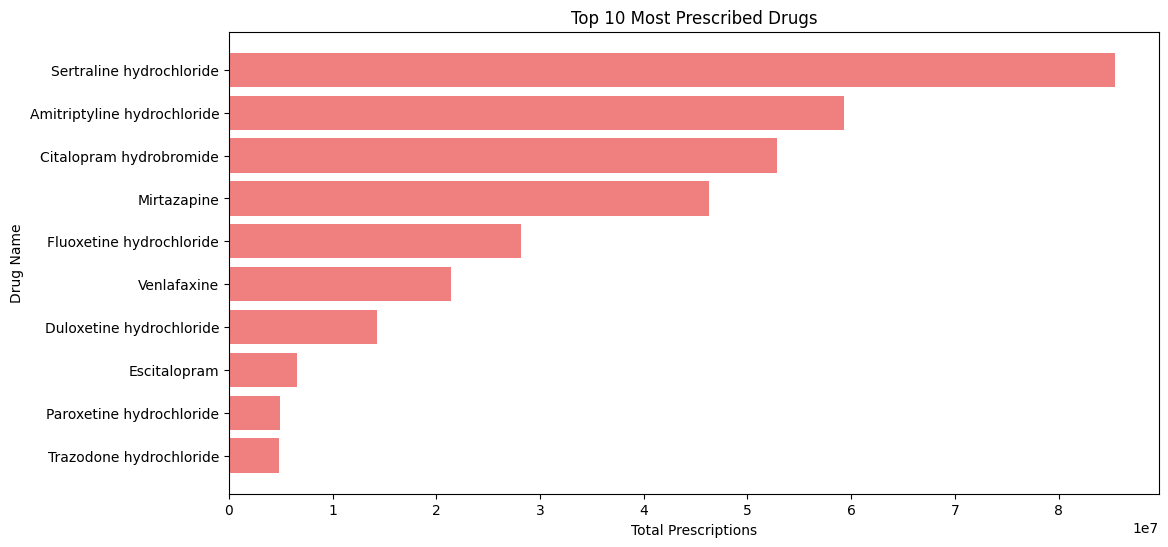

In [10]:
# Horizontal Bar Chart

plt.figure(figsize=(12,6))
plt.barh(top_drugs["BNF_CHEMICAL_SUBSTANCE"], top_drugs["ITEMS"], color='lightcoral')
plt.xlabel("Total Prescriptions")
plt.ylabel("Drug Name")
plt.title("Top 10 Most Prescribed Drugs")
plt.gca().invert_yaxis()
plt.show()


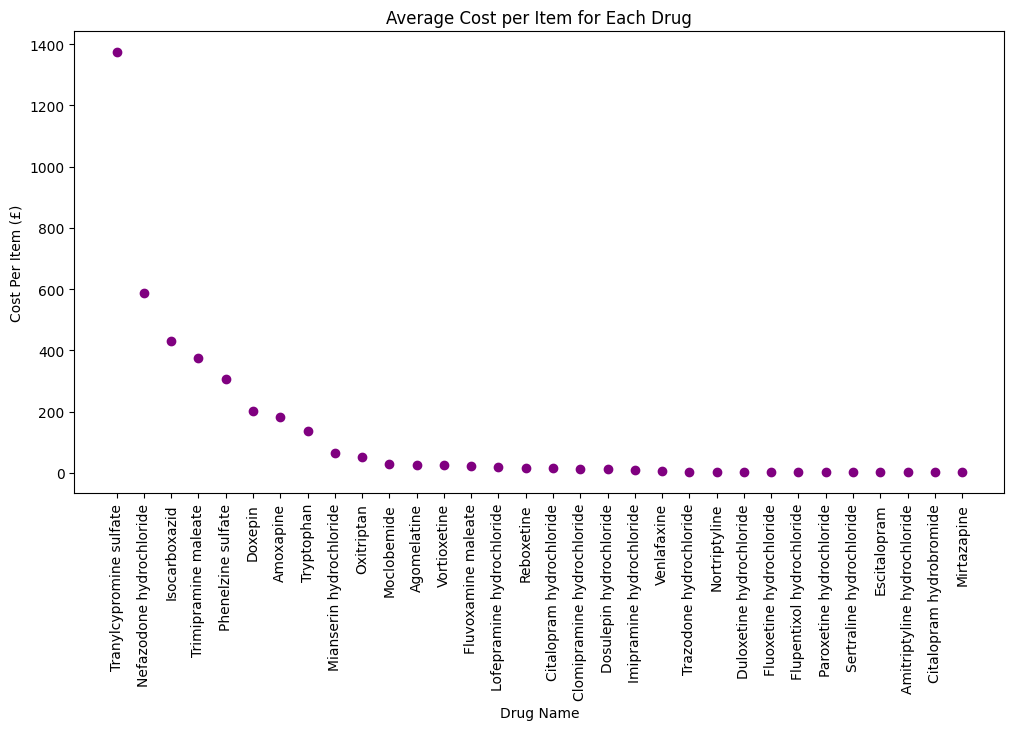

In [11]:
# Scatter Plot

plt.figure(figsize=(12,6))
plt.scatter(avg_cost_per_drug["BNF_CHEMICAL_SUBSTANCE"], avg_cost_per_drug["COST_PER_ITEM"], color='purple')
plt.xticks(rotation=90)
plt.xlabel("Drug Name")
plt.ylabel("Cost Per Item (£)")
plt.title("Average Cost per Item for Each Drug")
plt.show()


# Summary of Insights

#### 1.Regional Spending Differences
The Midlands and North East and Yorkshire recorded the highest total spending on antidepressants, with both regions exceeding £17.5 million in costs. In contrast, London and the South West had the lowest total expenditures, which could indicate either lower prescription rates or differences in drug pricing strategies across regions.

#### 2.Most Prescribed Drugs
When looking at prescription volume, Sertraline hydrochloride was by far the most commonly prescribed antidepressant, with over 85.4 million items dispensed. Amitriptyline and Citalopram followed, both exceeding 50 million items, making them key medications in NHS mental health treatment. Other frequently prescribed drugs included Mirtazapine, Fluoxetine, and Venlafaxine, reflecting their widespread use in managing depression and anxiety disorders.

#### 3.Cost Per Item Variations
Despite the high prescription rates of these common antidepressants, the cost per item varied significantly across different drugs. Tranylcypromine sulfate stood out with an exceptionally high cost of £1,372.85 per item, making it one of the most expensive drugs in the dataset. Nefazodone hydrochloride and Isocarboxazid also had notably high costs, surpassing £400 per item. In contrast, widely used medications such as Sertraline, Amitriptyline, and Citalopram remained cost-effective, with each item costing under £2.

#### 4.Price Disparity and Cost Efficiency
There is a significant cost gap between widely used and less common antidepressants. And the NHS appears to prioritize affordability, but high-cost drugs raise questions about budget efficiency and potential cost-saving alternatives.

#### 5.Recommendations
Reflect that exploring generic alternatives to high-cost antidepressants could reduce NHS spending. At the same time, we can further analyse why certain areas are spending more, thus revealing potential inefficiencies or prescribing trends. Finally, the data show that assessing the balance between cost and clinical effectiveness can help optimise mental health treatment across the NHS.


##### Chengdou Wei (Bruce)
##### Durham University

In [ ]:
## Summary of Insights

# 1. Regional Spending Differences
# The Midlands and North East and Yorkshire recorded the highest total spending on antidepressants, with both regions exceeding £17.5 million in costs. In contrast, London and the South West had the lowest total expenditures, which could indicate either lower prescription rates or differences in drug pricing strategies across regions.

# 2. Most Prescribed Drugs
# When looking at prescription volume, Sertraline hydrochloride was by far the most commonly prescribed antidepressant, with over 85.4 million items dispensed. Amitriptyline and Citalopram followed, both exceeding 50 million items, making them key medications in NHS mental health treatment. Other frequently prescribed drugs included Mirtazapine, Fluoxetine, and Venlafaxine, reflecting their widespread use in managing depression and anxiety disorders.

# 3. Cost Per Item Variations
# Despite the high prescription rates of these common antidepressants, the cost per item varied significantly across different drugs. Tranylcypromine sulfate stood out with an exceptionally high cost of £1,372.85 per item, making it one of the most expensive drugs in the dataset. Nefazodone hydrochloride and Isocarboxazid also had notably high costs, surpassing £400 per item. In contrast, widely used medications such as Sertraline, Amitriptyline, and Citalopram remained cost-effective, with each item costing under £2.

# 4. Price Disparity and Cost Efficiency
# There is a significant cost gap between widely used and less common antidepressants. And the NHS appears to prioritize affordability, but high-cost drugs raise questions about budget efficiency and potential cost-saving alternatives.

# 5. Recommendations
# Reflect that exploring generic alternatives to high-cost antidepressants could reduce NHS spending. At the same time, we can further analyse why certain areas are spending more, thus revealing potential inefficiencies or prescribing trends. Finally, the data show that assessing the balance between cost and clinical effectiveness can help optimise mental health treatment across the NHS.

In [13]:
summary_df.to_csv("cleaned_summary_data.csv", index=False)
drug_df.to_csv("cleaned_drug_data.csv", index=False)
